# Cardiovasculaire Risks

mettre en œuvre une régression logistique dans le but
d’analyser une variable binaire (dont les valeurs seraient VRAI/FAUX, 0/ ou OUI/NON) en
fonction d'une variable explicative quantitative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('carData.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

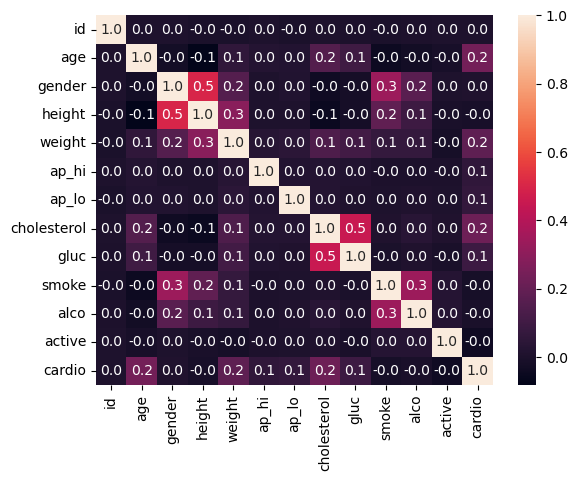

In [5]:
sns.heatmap(df.corr() ,annot=True ,fmt='.1f' )

In [6]:
df.isnull().sum() 

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:>

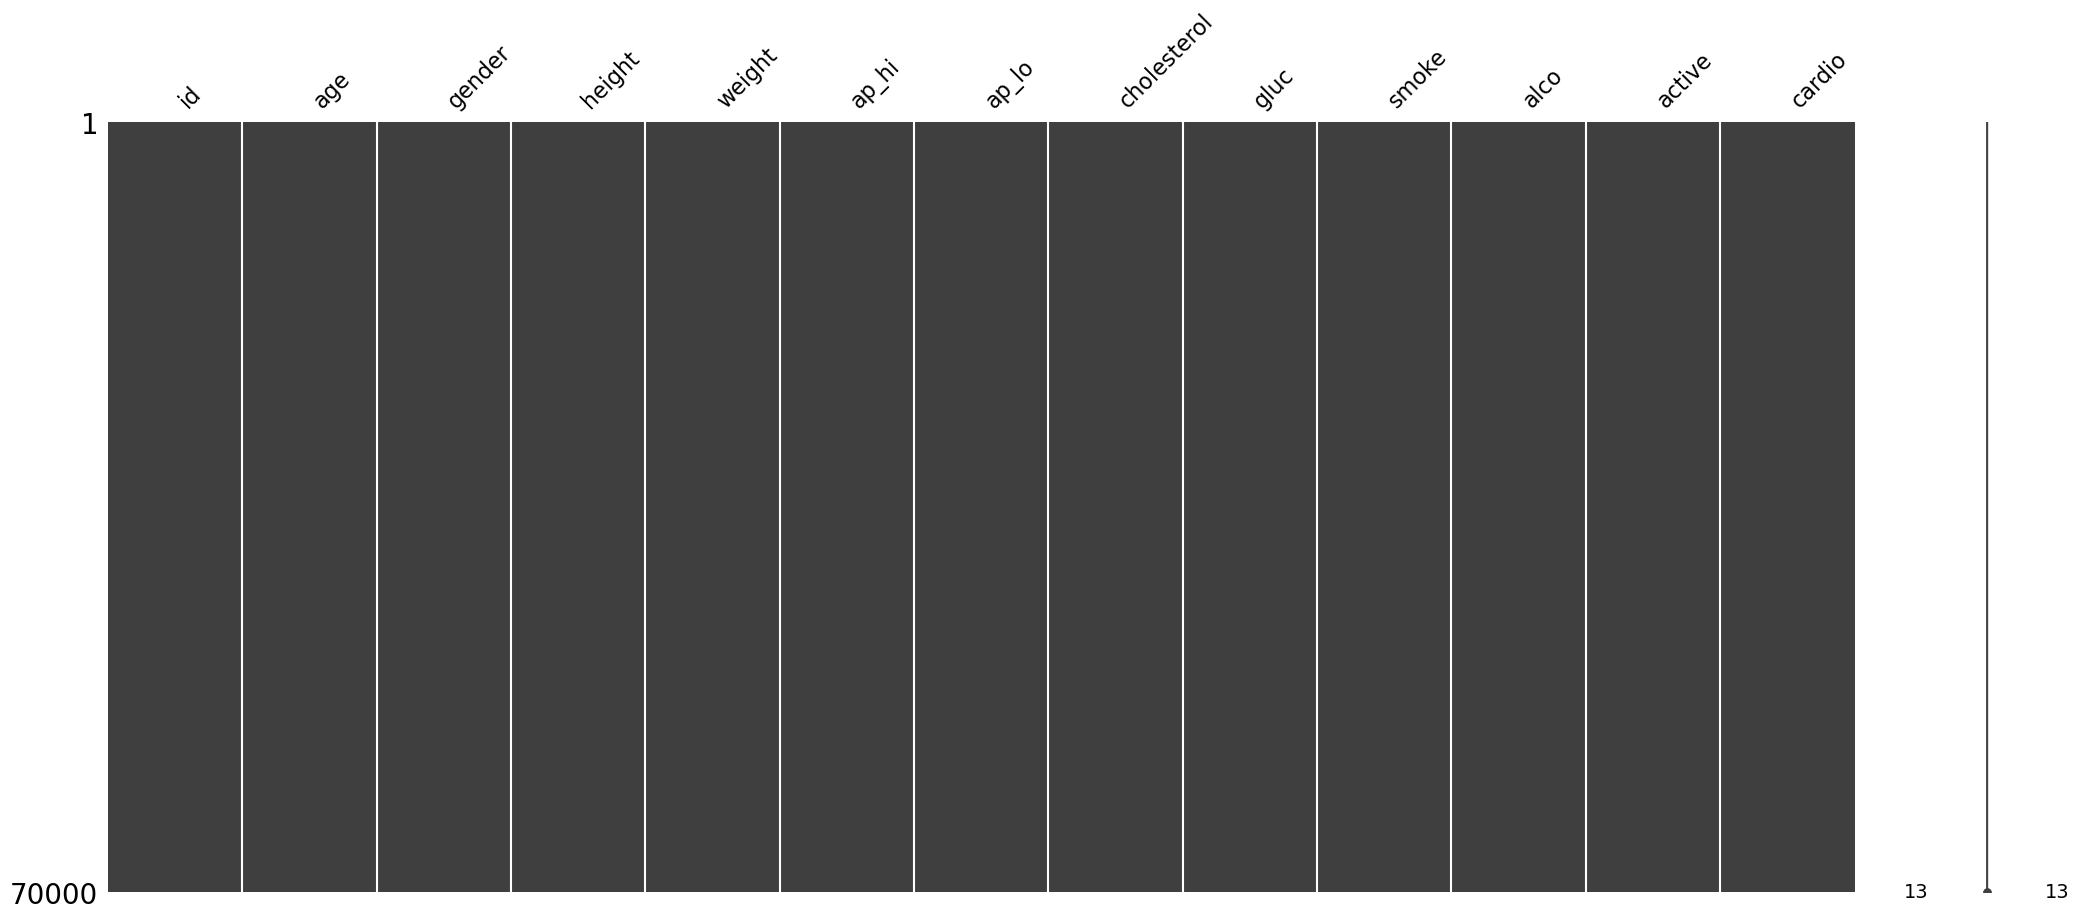

In [7]:
msno.matrix(df)

esaie de graph matplotlib

Text(0.5, 1.0, "c'est jolie, non ?")

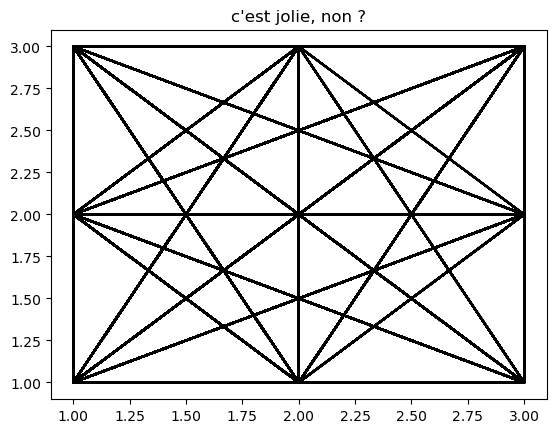

In [8]:
plt.plot(df.gluc,df.cholesterol,color="black")
plt.title ("c'est jolie, non ?")

comme j'ai pu le voire dans mes essais les méthode de l'ancient projet sont inutilsable pour celui-ci (à effacer)

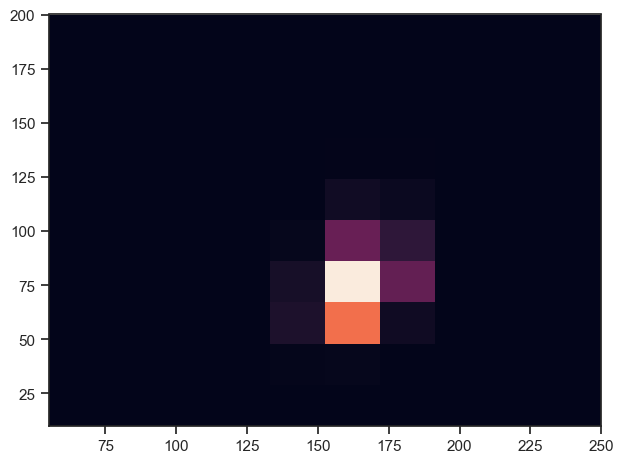

In [38]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(df.height, df.weight)

ce graph ne marche pas trés bien avec le jeux actuelle 

## debut de la visulisation de la donné

Text(0.5, 1.0, "l'ages moyen des sujet")

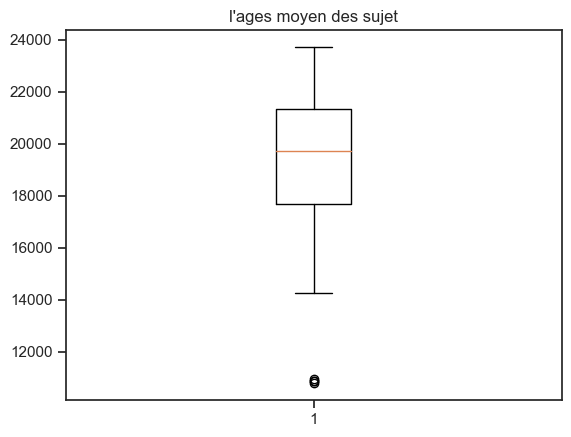

In [32]:
plt.boxplot(df.age)
plt.title("l'ages moyen des sujet")

Text(0.5, 1.0, 'corélation entre le poids et la tailles')

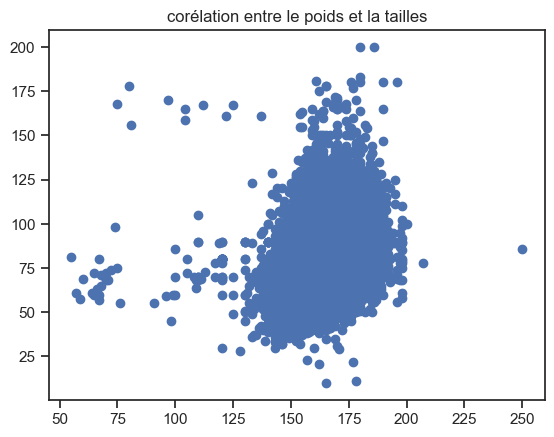

In [30]:
plt.scatter(df.height,df.weight)
plt.title("corélation entre le poids et la tailles")

Text(0.5, 1.0, 'la visualisation des donnés relative au sang')

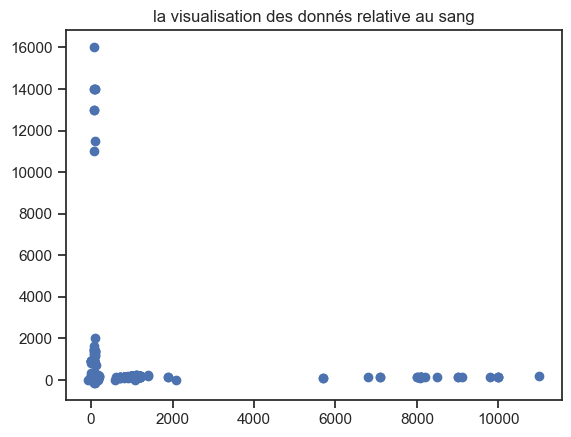

In [29]:
plt.scatter(df.ap_lo,df.ap_hi)
plt.title("la visualisation des donnés relative au sang")

In [9]:
genders = df.groupby(['gender']).size().to_frame().sort_values([0], ascending=False).reset_index()
cholesterols = df.groupby(['cholesterol']).size().to_frame().sort_values([0], ascending=False).reset_index()
glucose = df.groupby(['gluc']).size().to_frame().sort_values([0], ascending=False).reset_index()
smokes = df.groupby(['smoke']).size().to_frame().sort_values([0], ascending=False).reset_index()
alcolisme = df.groupby(['alco']).size().to_frame().sort_values([0], ascending=False).reset_index()
actives = df.groupby(['active']).size().to_frame().sort_values([0], ascending=False).reset_index()
cardios = df.groupby(['cardio']).size().to_frame().sort_values([0], ascending=False).reset_index()

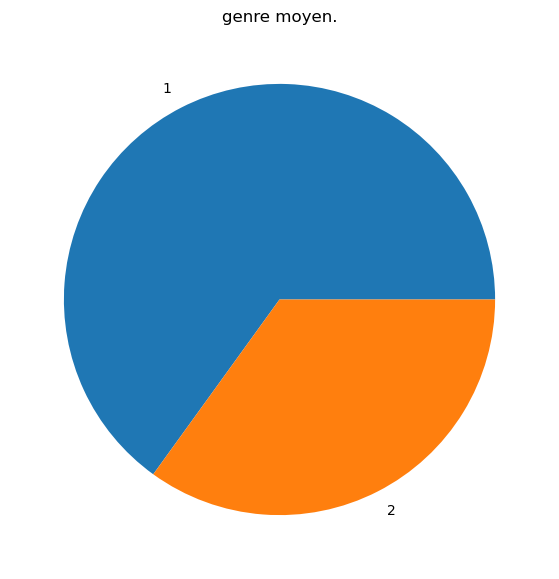

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(genders[0], labels = genders.gender) 
plt.title("genre moyen.")

plt.savefig("gendes.png") 

plt.show()

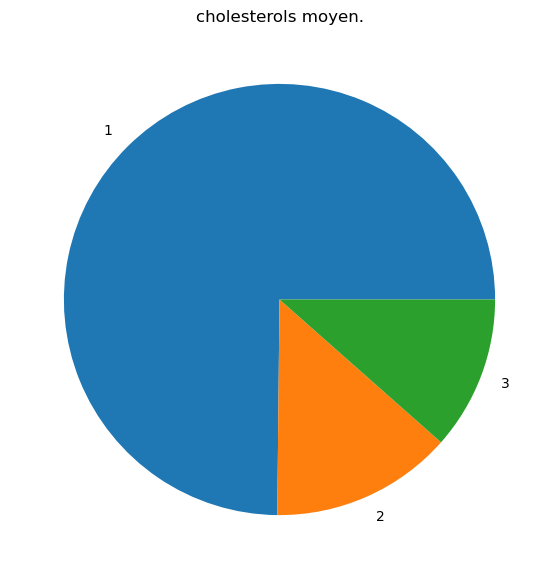

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(cholesterols[0], labels = cholesterols.cholesterol) 
plt.title("cholesterols moyen.")

plt.savefig("cholesterols.png") 

plt.show()

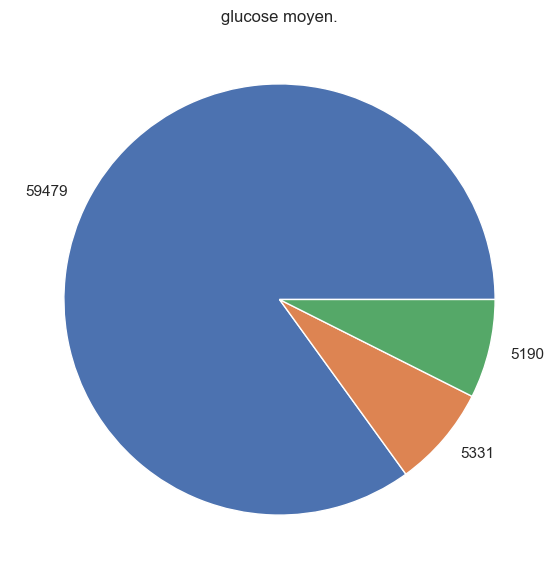

In [28]:
fig = plt.figure(figsize =(10, 7))
plt.pie(glucose[0], labels = glucose[0]) 
plt.title("glucose moyen.")

plt.savefig("glucose.png") 

plt.show()

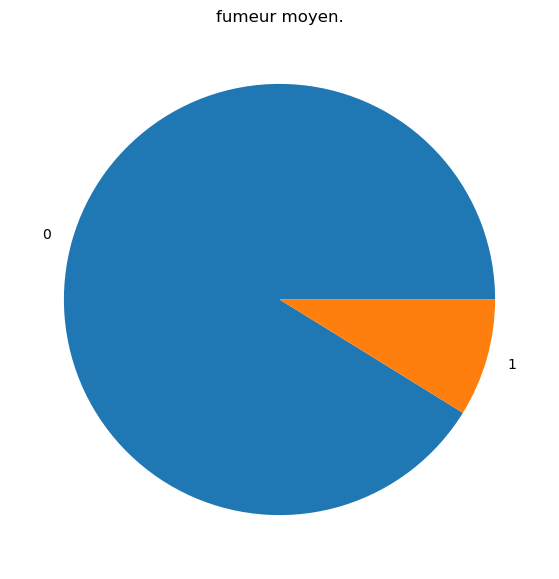

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.pie(smokes[0], labels = smokes.smoke) 
plt.title("fumeur moyen.")

plt.savefig("smokes.png") 

plt.show()

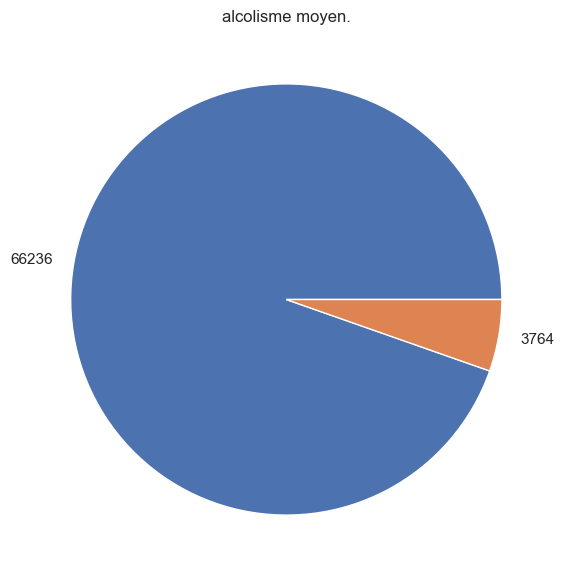

In [25]:
fig = plt.figure(figsize =(10, 7))
plt.pie(alcolisme[0], labels = alcolisme[0]) 
plt.title("alcolisme moyen.")

plt.savefig("alcolisme.png") 

plt.show()

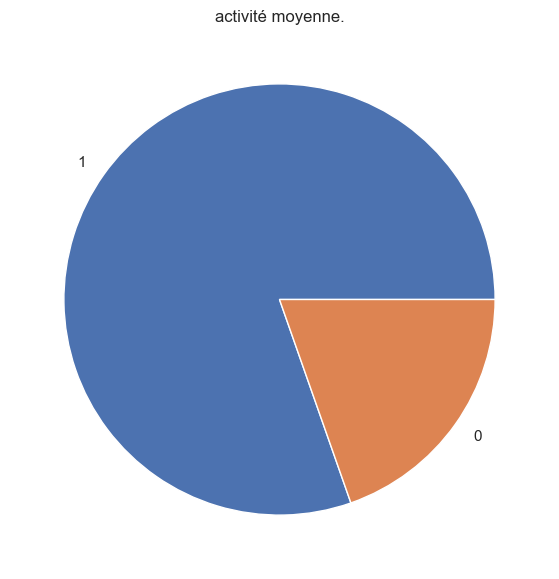

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.pie(actives[0], labels = actives.active) 
plt.title("activité moyenne.")

plt.savefig("actives.png") 

plt.show()

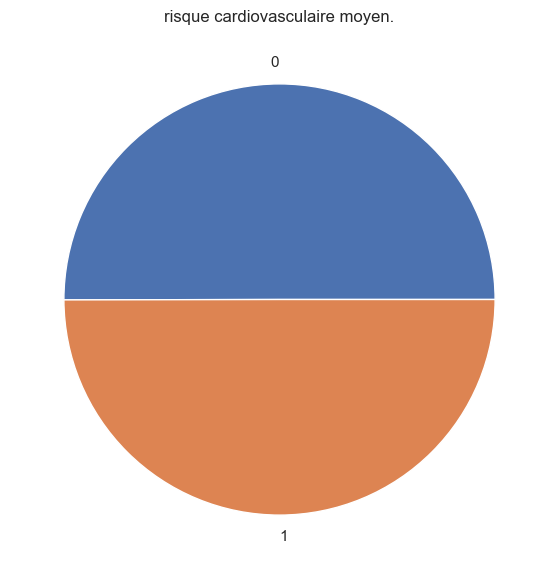

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.pie(cardios[0], labels = cardios.cardio) 
plt.title("risque cardiovasculaire moyen.")

plt.savefig("gendes.png") 

plt.show()